more than two classes are there so selecting two classes for now
 
 kNN classifier trained with k=3
Accuracy 
 0.9166666666666666
Classification Report 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.50      0.67         2

    accuracy                           0.92        12
   macro avg       0.95      0.75      0.81        12
weighted avg       0.92      0.92      0.90        12



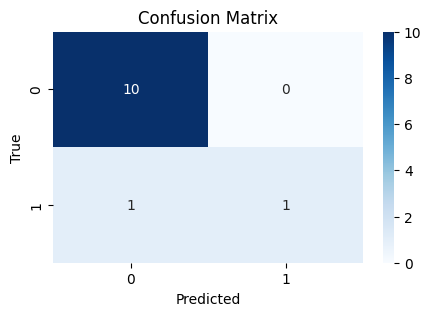

In [46]:
# A5 Train a kNN classifier (k =3) using the training set obtained from above exercise

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/content/TRAINING_DATA.xlsx")


y = df.iloc[:, -1]

X = df.iloc[:, :-1]

if y.dtype != object:
    le = LabelEncoder()
    y = le.fit_transform(y)

classes = np.unique(y)
if len(classes) > 2:
    print("more than two classes are there so selecting two classes for now")
    class1, class2 = classes[0], classes[1]
    X = X[(y == class1) | (y == class2)]
    y = y[(y == class1) | (y == class2)]


neigh = KNeighborsClassifier(n_neighbors=3)


neigh.fit(X, y)

print(" \n kNN classifier trained with k=3")
y_pred = neigh.predict(X)


accuracy = accuracy_score(y, y_pred)
print("Accuracy \n", accuracy)


report = classification_report(y, y_pred)
print("Classification Report \n", report)




conf_mat = confusion_matrix(y, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()